In [1]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))
from nltk.tokenize import word_tokenize

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [2]:
df = pd.read_excel('Productos con Data Extra.xlsx')

In [4]:
df_aux = df.groupby('nombre_marca')['id_reciclaje'].count()
df_aux.to_csv('number_marca.csv')

In [102]:
df.head()

,id_producto,id_marca,nombre_marca,id_empresa,nombre_empresa,id_reciclaje,nombre_reciclaje,id_producto_clasificacion,nombre_productos_clasificacion,nombre,...,estado,created_at,updated_at,subclasificacion,is_new,is_validado,is_completo,promedio,origen,informacion
0,1,1.0,Tottus,NaN,TOTTUS,36.0,OTRO,3.0,DESPENSA,Oregano,...,1,2021-03-03 13:05:38,2021-03-21 20:16:18,NaN,0,1,0,NaN,NaN,NaN
1,2,2.0,Raid,NaN,RAID,31.0,HOJALATA,1.0,ASEO Y LIMPIEZA,"MATA MOSCAS, MOSQUITOS Y ZANCUDOS",...,1,2021-03-20 23:24:29,2021-09-08 00:38:36,METALES,0,1,0,NaN,NaN,NaN
2,3,3.0,Tanax,NaN,TANAX,31.0,HOJALATA,1.0,ASEO Y LIMPIEZA,ANTI BAC Desinfectante,...,1,2021-03-21 20:23:03,2021-03-21 20:23:03,NaN,0,1,0,NaN,NaN,NaN
3,4,4.0,Simond's,NaN,SIMOND'S,36.0,OTRO,1.0,ASEO Y LIMPIEZA,Jabón Glicerina HIGIENIC,...,1,2021-03-21 21:08:46,2021-03-21 21:14:32,NaN,0,1,0,NaN,NaN,NaN
4,5,5.0,Sanyfarm,NaN,SANYFARM,31.0,HOJALATA,1.0,ASEO Y LIMPIEZA,ALCOHOL MICROFILTRADO 70º AEROSOL,...,1,2021-03-21 21:16:44,2021-09-08 00:38:36,METALES,0,1,0,NaN,NaN,NaN


In [103]:
cols = ['nombre_marca', 'nombre_empresa', 'nombre_reciclaje', 'nombre_productos_clasificacion', 'nombre', 'gramos_envase', 'unidad', 'envase', 'descripcion_envase', 'formato', 'tipo', 'subclasificacion']

In [104]:
df2 = df[cols]
for col in cols:
    df2[col]=df2[col].astype('category').cat.codes

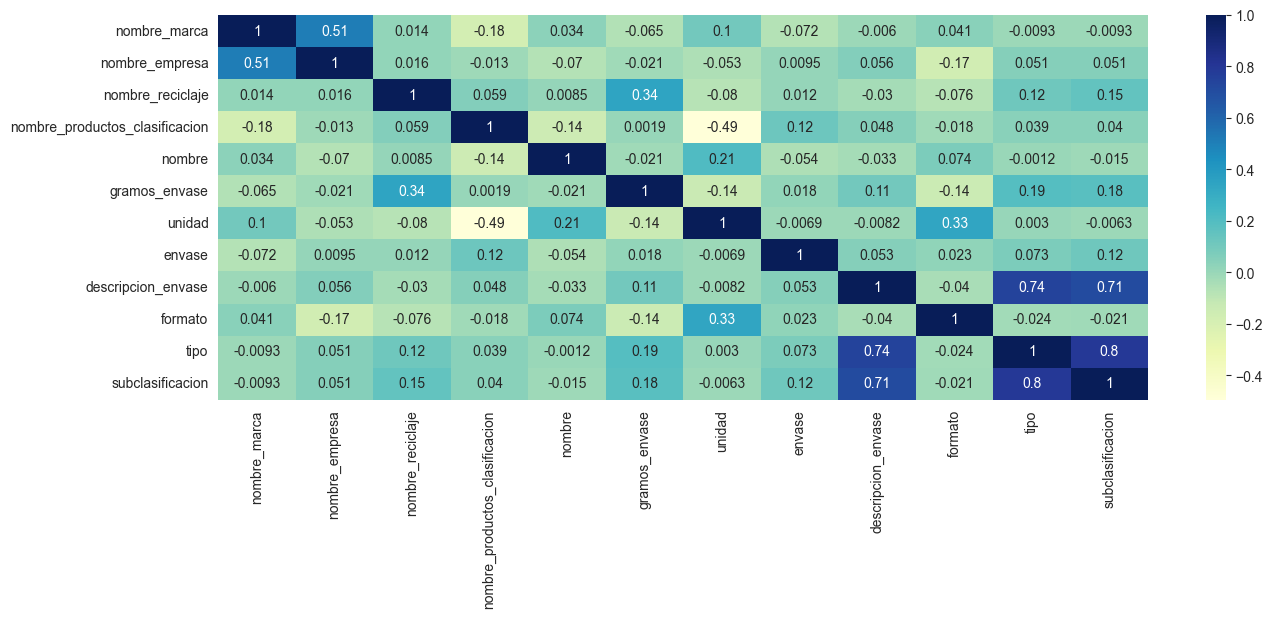

In [105]:
corrMatrix = df2[cols].corr()
plt.figure(figsize=(15,5))
fig_corr = sns.heatmap(corrMatrix,cmap="YlGnBu", annot=True)
plt.show()

In [106]:
df = df[cols]
x = df.isna().sum().to_frame()
x[1] = len(df) - x[0]
x.columns = ['incompletos', 'completos']

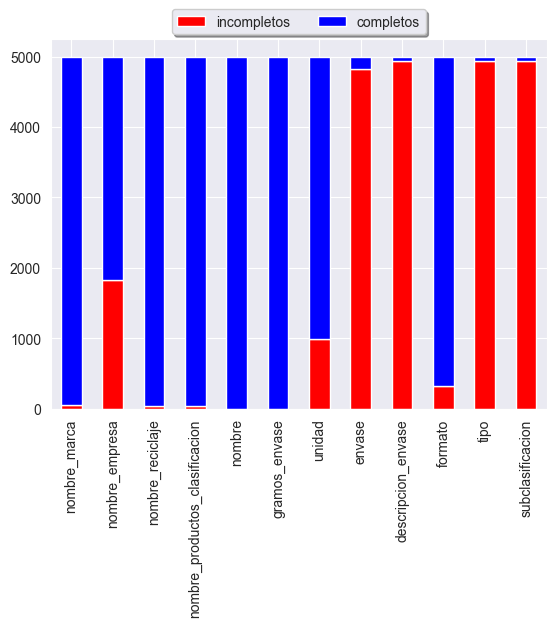

In [107]:
ax = x.plot(kind="bar", stacked=True, color = ['r', 'b'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)

In [111]:
df[df['gramos_envase']>1]

,nombre_marca,nombre_empresa,nombre_reciclaje,nombre_productos_clasificacion,nombre,gramos_envase,unidad,envase,descripcion_envase,formato,tipo,subclasificacion
27,Surlat,SURLAT,POLIETILENO Y ALUMINIO,FRESCOS Y LÁCTEOS,leche blanca descremada sin lactosa,25.0,LITRO,NaN,ENVASE CON TAPA,1LITRO,LÁCTEOS,CARTÓN
39,Loncoleche,LONCOLECHE,POLIETILENO Y ALUMINIO,FRESCOS Y LÁCTEOS,leche descremada sin lactosa,26.0,LT,NaN,NaN,1LT,NaN,NaN
42,Lider,LIDER,POLIETILENO Y ALUMINIO,FRESCOS Y LÁCTEOS,"leche blanca descremada lider, 1lt",25.0,LITRO,NaN,ENVASE SIN TAPA,1LITRO,LÁCTEOS,CARTÓN
43,Celebrite,CELEBRITE,VIDRIO,"LICORES, CERVEZA S Y VINOS",espumante celebrite extra brut 750 cc,800.0,NaN,NaN,NaN,NaN,NaN,NaN
46,Cachantun,CCU,PET 1,"BEBIDAS, AGUAS Y JUGOS",agua de pera mas,40.0,LT,NaN,NaN,16LT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4972,Colun,COLUN,PS 6,FRESCOS Y LÁCTEOS,colún frutilla 125 gr,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4974,Coca cola,COCA COLA COMPANY,PET 1,"BEBIDAS, AGUAS Y JUGOS","coca cola 1,25, botella plastica reciclable",15.0,NaN,NaN,NaN,NaN,NaN,NaN
4985,Coca cola,COCA COLA COMPANY,PET 1,"BEBIDAS, AGUAS Y JUGOS",coca cola light 1.25 l plastica,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4987,Cusqueña,AB INBEV,VIDRIO,"LICORES, CERVEZA S Y VINOS",cusqueña golden lager 330 cc,15.0,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df['nombre_productos_clasificacion'].unique().tolist()

['DESPENSA',
 'ASEO Y LIMPIEZA',
 'LICORES, CERVEZA S Y  VINOS',
 'DESAYUNOS, SNACKS Y  DULCES',
 'BEBIDAS, AGUAS Y JUGOS',
 'OTROS',
 'CUIDADO PERSONAL',
 'PERFUMERIA',
 'FRESCOS Y LÁCTEOS',
 'CARNES, PESCADOS Y  FIAMBRES',
 'CONGELADOS',
 nan,
 'JUGUETERÍA Y ENTRETENIMIENTO',
 'SIN DEPARTAMENTO',
 'SALUD: REMEDIOS Y FÁRMACOS',
 'FRUTAS Y VERDURAS']

In [109]:
df['nombre'] = df['nombre'].str.lower()
df['nombre'] = df['nombre'].astype(str)
prod_list = df['nombre_productos_clasificacion'].unique().tolist()
#df1 = df[df['nombre_productos_clasificacion'] == prod_list[10]]
common_words = list(Counter(" ".join(df["nombre"]).split()).keys())
common_words = [x for x in common_words if len(x)>3]
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)
common_words = [x for x in common_words if not(has_numbers(x))]
common_words

['oregano',
 'mata',
 'moscas,',
 'mosquitos',
 'zancudos',
 'anti',
 'desinfectante',
 'jabón',
 'glicerina',
 'higienic',
 'alcohol',
 'microfiltrado',
 'aerosol',
 'pisco',
 'campanario',
 'sour',
 'plus',
 'spray',
 'cloro',
 'lavanda',
 'galleta',
 'costa',
 'soda',
 'line',
 'vino',
 'tinto',
 'cabernet',
 'sauvignon',
 'collecion',
 'jugo',
 'natural',
 'manzana',
 'beker',
 'cerveza',
 'mistral',
 'especial',
 'añejado',
 'roble',
 'botella',
 'poeriod',
 'prof',
 'prod',
 'from',
 'celular',
 'hand',
 'cream',
 'humectante',
 'tijeras',
 'tempera',
 'colores',
 'crema',
 'corporal',
 'extra',
 'caja',
 'lápices',
 'bidon',
 'agua',
 'purificada',
 'leche',
 'blanca',
 'descremada',
 'lactosa',
 'goma',
 'para',
 'borrar',
 'cuaderno',
 'torre',
 'boomerang',
 'producto',
 'pielarmina',
 'ketchup',
 'cayena',
 'pasapalabra',
 'soft',
 'milk',
 'papayas',
 'nalcahue',
 'bandeja',
 'carne/',
 'hortalizas',
 'miller',
 'genuine',
 'draft',
 'lata',
 'desodorante',
 'vichy',
 'lide

In [110]:
alcohol = ['cerveza', 'vino', 'cerv', 'pisco', 'carmenere']
bebida = ['bebida']
despensa = ['aceite', 'helado', 'pasta', 'galleta', 'cereal', 'salsa', 'arroz']
lacteos = ['yoghurt', 'crema', ]

DESPENSA = ['pasta', 'aceite', 'salsa', 'mayonesa', 'tomate', 'arroz', 'harina', 'sal', 'huevo', 'ketchup', 'spaghetti']
ASEO Y LIMPIEZA =
LICORES, CERVEZAS Y  VINOS
DESAYUNOS, SNACKS Y  DULCES
BEBIDAS, AGUAS Y JUGOS
CUIDADO PERSONAL
PERFUMERIA
FRESCOS Y LÁCTEOS
CARNES, PESCADOS Y  FIAMBRES
CONGELADOS
JUGUETERÍA Y ENTRETENIMIENTO
SALUD: REMEDIOS Y FÁRMACOS
FRUTAS Y VERDURAS

SyntaxError: invalid syntax (744637954.py, line 7)

In [ ]:
df['unidad'].value_counts()